#### Get Produced Data
---

In [1]:
import sys, os, json
sys.path.insert(1, "../../")
from src.combine import combine_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [54]:
%%time
df = pd.read_feather("../../data/combined_all_features/combined_1618211254.feather")

CPU times: user 9.37 s, sys: 22 s, total: 31.4 s
Wall time: 6min 15s


In [55]:
df.sample_date.min(), df.sample_date.max()

(Timestamp('2019-02-01 00:00:00'), Timestamp('2021-03-12 00:00:00'))

In [61]:
mmonth = "202103"
s3_base_path = f"s3://sofi-data-science/jxu/money-risk-models/customer-risk-model/monitor/{mmonth}"

train_start = pd.to_datetime("2019-02-01")
train_end = pd.to_datetime("2020-11-30")
valid_dates = [pd.to_datetime(d) for d in ["2020-12-01"]]

In [62]:
train_df = df[df.sample_date.between(train_start, train_end)]
test_df = df[df.sample_date.isin(valid_dates)]
train_df.shape, test_df.shape

((4713188, 91), (570248, 91))

<AxesSubplot:>

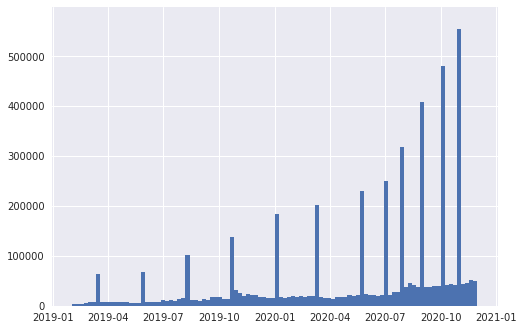

In [64]:
train_df.sample_date.hist(bins=100)
test_df.sample_date.hist(bins=10)

In [65]:
train_df.to_parquet(os.path.join(s3_base_path, "dev_train_20190201_20201130.parquet"))
test_df.to_parquet(os.path.join(s3_base_path, "dev_test_20201201.parquet"))